### Description

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

Estimation of Obesity Levels Based On Eating Habits and Physical Condition [Dataset]. (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5H31Z.

In [20]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# 1. Load data
df_raw = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
df_raw.sample(10)

Gender        Age    Height      Weight family_history_with_overweight  \
977     Male  21.180346  1.773766   89.282820                            yes   
1882  Female  25.612462  1.674515  112.879662                            yes   
83    Female  19.000000  1.600000   45.000000                             no   
726   Female  20.255616  1.534223   41.268597                             no   
743     Male  18.381382  1.722547   53.783977                            yes   
1795    Male  20.068432  1.657132  105.580491                            yes   
736   Female  19.029494  1.573987   44.316254                             no   
1390  Female  22.676243  1.620938   82.283185                            yes   
1239  Female  23.000000  1.610820   82.532994                            yes   
1954  Female  25.311534  1.685482  113.451224                            yes   

     FAVC      FCVC       NCP        CAEC SMOKE      CH2O  SCC       FAF  \
977   yes  2.010684  1.322087   Sometimes    no  2.000000   no  0.540397   
1882  yes  3.000000  3.000000   Sometimes    no  2.989389   no  0.360090   
83     no  3.000000  3.000000          no    no  3.000000  yes  2.000000   
726   yes  2.673638  2.779379  Frequently    no  1.249074   no  0.043412   
743   yes  2.000000  3.131032   Sometimes    no  2.072194   no  1.487987   
1795  yes  2.724121  1.437959   Sometimes    no  1.590418   no  0.029603   
736    no  2.984004  3.000000  Frequently    no  1.015249  yes  1.327833   
1390  yes  1.967061  1.000000   Sometimes    no  2.548651   no  0.249264   
1239  yes  2.096630  2.879541   Sometimes    no  2.432967   no  1.887012   
1954  yes  3.000000  3.000000   Sometimes    no  2.987718   no  0.387074   

           TUE       CALC                 MTRANS           NObeyesdad  
977   0.973834  Sometimes  Public_Transportation  Overweight_Level_II  
1882  0.169016  Sometimes  Public_Transportation     Obesity_Type_III  
83    0.000000         no                Walking  Insufficient_Weight  
726   0.403694  Sometimes  Public_Transportation  Insufficient_Weight  
743   2.000000  Sometimes  Public_Transportation  Insufficient_Weight  
1795  1.122118         no  Public_Transportation      Obesity_Type_II  
736   0.000000  Sometimes  Public_Transportation  Insufficient_Weight  
1390  1.516731  Sometimes  Public_Transportation       Obesity_Type_I  
1239  0.000000         no  Public_Transportation       Obesity_Type_I  
1954  0.283804  Sometimes  Public_Transportation     Obesity_Type_III

In [5]:
# 2 Data Processing
df_interim = (
    df_raw
    .copy()
    .set_axis(
        df_raw.columns.str.replace(' ', '_') # reemplazar espacio por _
        .str.replace(r'\W','',regex=True) # reemplazar caracteres no alfabéticos por nada
        .str.lower() # el resultado lo pasamos a minúsculas
        .str.slice(0,40), axis=1, # slice sirve para cortar el texto a un máximo de 40 caracteres
    )
    .rename(columns={'nobeyesdad':'target'})
    .astype({"gender": "category", "family_history_with_overweight": "category", "favc": "category", "caec": "category", "smoke": "category", "scc": "category", "calc": "category", "mtrans": "category", "target": "category"})


)
df_interim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   gender                          2111 non-null   category
 1   age                             2111 non-null   float64 
 2   height                          2111 non-null   float64 
 3   weight                          2111 non-null   float64 
 4   family_history_with_overweight  2111 non-null   category
 5   favc                            2111 non-null   category
 6   fcvc                            2111 non-null   float64 
 7   ncp                             2111 non-null   float64 
 8   caec                            2111 non-null   category
 9   smoke                           2111 non-null   category
 10  ch2o                            2111 non-null   float64 
 11  scc                             2111 non-null   category
 12  faf                 

In [6]:
# 2.2 Create the final dataset with the target in front, show result
df = (
    df_interim
    .copy()
    .reindex(
        columns=(
            ['target'] +
            [c for c in df_interim.columns.to_list() if c not in ['target']]
        )
    )
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   target                          2111 non-null   category
 1   gender                          2111 non-null   category
 2   age                             2111 non-null   float64 
 3   height                          2111 non-null   float64 
 4   weight                          2111 non-null   float64 
 5   family_history_with_overweight  2111 non-null   category
 6   favc                            2111 non-null   category
 7   fcvc                            2111 non-null   float64 
 8   ncp                             2111 non-null   float64 
 9   caec                            2111 non-null   category
 10  smoke                           2111 non-null   category
 11  ch2o                            2111 non-null   float64 
 12  scc                 

In [7]:
df["target"].value_counts()

target
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [8]:
# Step 3. Perform EDA
# 3.1 Split the dataset
df_train, df_test = train_test_split(df,
                                     random_state=2024,
                                     test_size=0.2)
df_train = df_train.reset_index(drop=True).sort_values(by='target')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1688 entries, 0 to 843
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   target                          1688 non-null   category
 1   gender                          1688 non-null   category
 2   age                             1688 non-null   float64 
 3   height                          1688 non-null   float64 
 4   weight                          1688 non-null   float64 
 5   family_history_with_overweight  1688 non-null   category
 6   favc                            1688 non-null   category
 7   fcvc                            1688 non-null   float64 
 8   ncp                             1688 non-null   float64 
 9   caec                            1688 non-null   category
 10  smoke                           1688 non-null   category
 11  ch2o                            1688 non-null   float64 
 12  scc                       

In [9]:
# 3.2 Show descriptive statistics
display(df_train.describe(include='category').T)
display(df_train.describe().T)

count unique                    top  freq
target                          1688      7         Obesity_Type_I   284
gender                          1688      2                   Male   852
family_history_with_overweight  1688      2                    yes  1385
favc                            1688      2                    yes  1493
caec                            1688      4              Sometimes  1423
smoke                           1688      2                     no  1653
scc                             1688      2                     no  1614
calc                            1688      4              Sometimes  1115
mtrans                          1688      5  Public_Transportation  1265

count       mean        std        min        25%        50%  \
age     1688.0  24.334696   6.276302  14.000000  20.000000  22.821925   
height  1688.0   1.702501   0.093419   1.456346   1.630000   1.701383   
weight  1688.0  86.631682  26.125521  39.101805  65.815202  82.937190   
fcvc    1688.0   2.417224   0.532801   1.000000   2.000000   2.373567   
ncp     1688.0   2.685098   0.784603   1.000000   2.658787   3.000000   
ch2o    1688.0   2.007643   0.616409   1.000000   1.568653   2.000000   
faf     1688.0   0.999587   0.846543   0.000000   0.115823   1.000000   
tue     1688.0   0.666738   0.611404   0.000000   0.000000   0.634378   

               75%     max  
age      26.000000   56.00  
height    1.769624    1.98  
weight  108.094345  173.00  
fcvc      3.000000    3.00  
ncp       3.000000    4.00  
ch2o      2.497938    3.00  
faf       1.662348    3.00  
tue       1.000000    2.00

In [10]:
df_train["target"].value_counts()

target
Obesity_Type_I         284
Obesity_Type_III       254
Obesity_Type_II        244
Overweight_Level_II    233
Overweight_Level_I     226
Normal_Weight          224
Insufficient_Weight    223
Name: count, dtype: int64

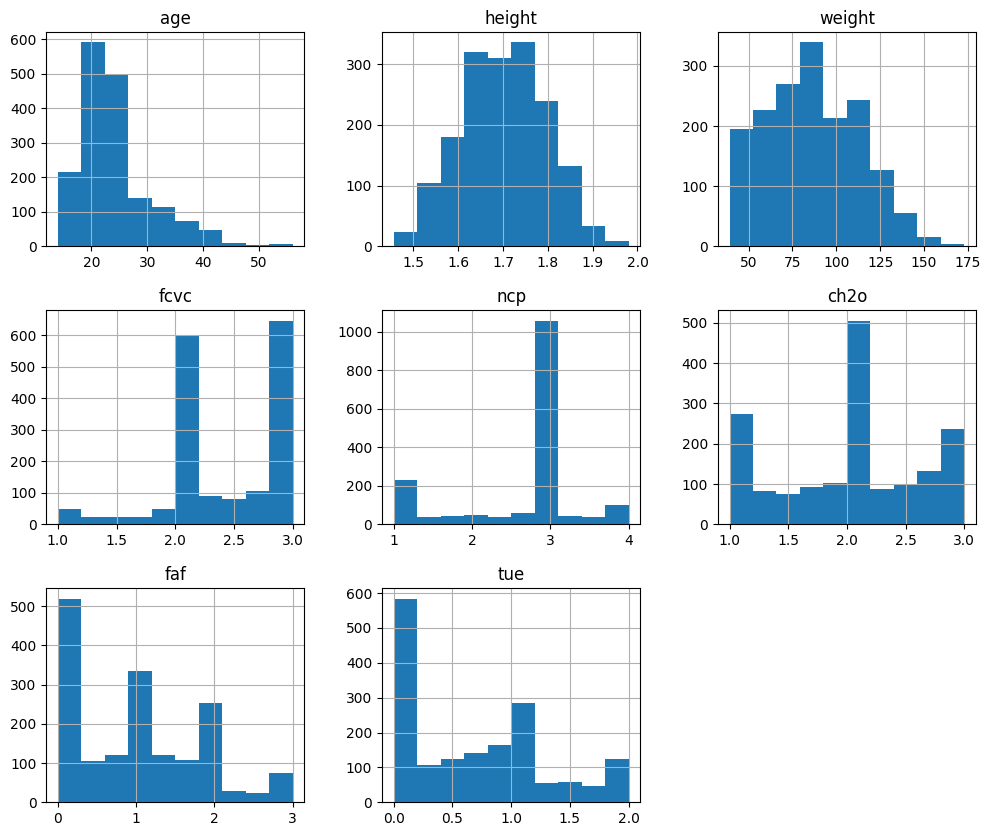

In [11]:
# 3.3 Univariate analysis - numerical features
df_train.hist(figsize=(12, 10))
plt.show()

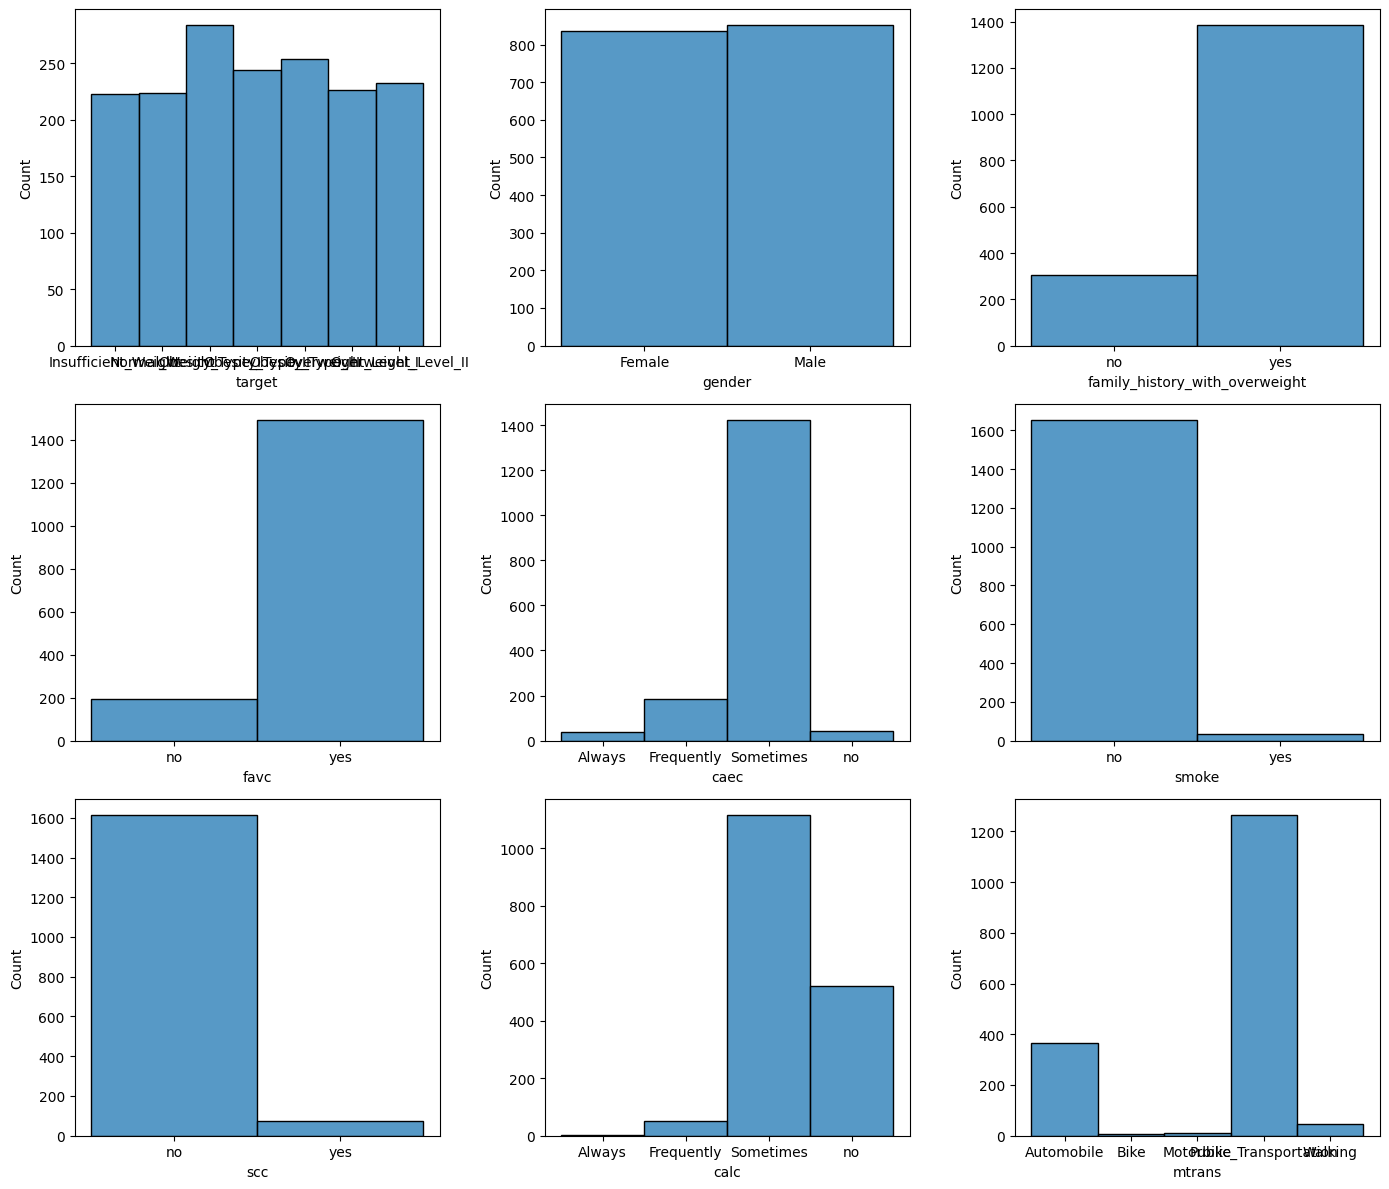

In [12]:
# 3.5 Univariate analysis - categorical features
# Create subplots 
fig, axis = plt.subplots(3, 3, figsize=(14, 12)) 

# Plotting histograms 
sns.histplot(ax=axis[0, 0], data=df_train, x="target") 
sns.histplot(ax=axis[0, 1], data=df_train, x="gender") 
sns.histplot(ax=axis[0, 2], data=df_train, x="family_history_with_overweight") 
sns.histplot(ax=axis[1, 0], data=df_train, x="favc") 
sns.histplot(ax=axis[1, 1], data=df_train, x="caec") 
sns.histplot(ax=axis[1, 2], data=df_train, x="smoke") 
sns.histplot(ax=axis[2, 0], data=df_train, x="scc") 
sns.histplot(ax=axis[2, 1], data=df_train, x="calc") 
sns.histplot(ax=axis[2, 2], data=df_train, x="mtrans") 

# Show plot 
plt.tight_layout() 

# Adjust sub

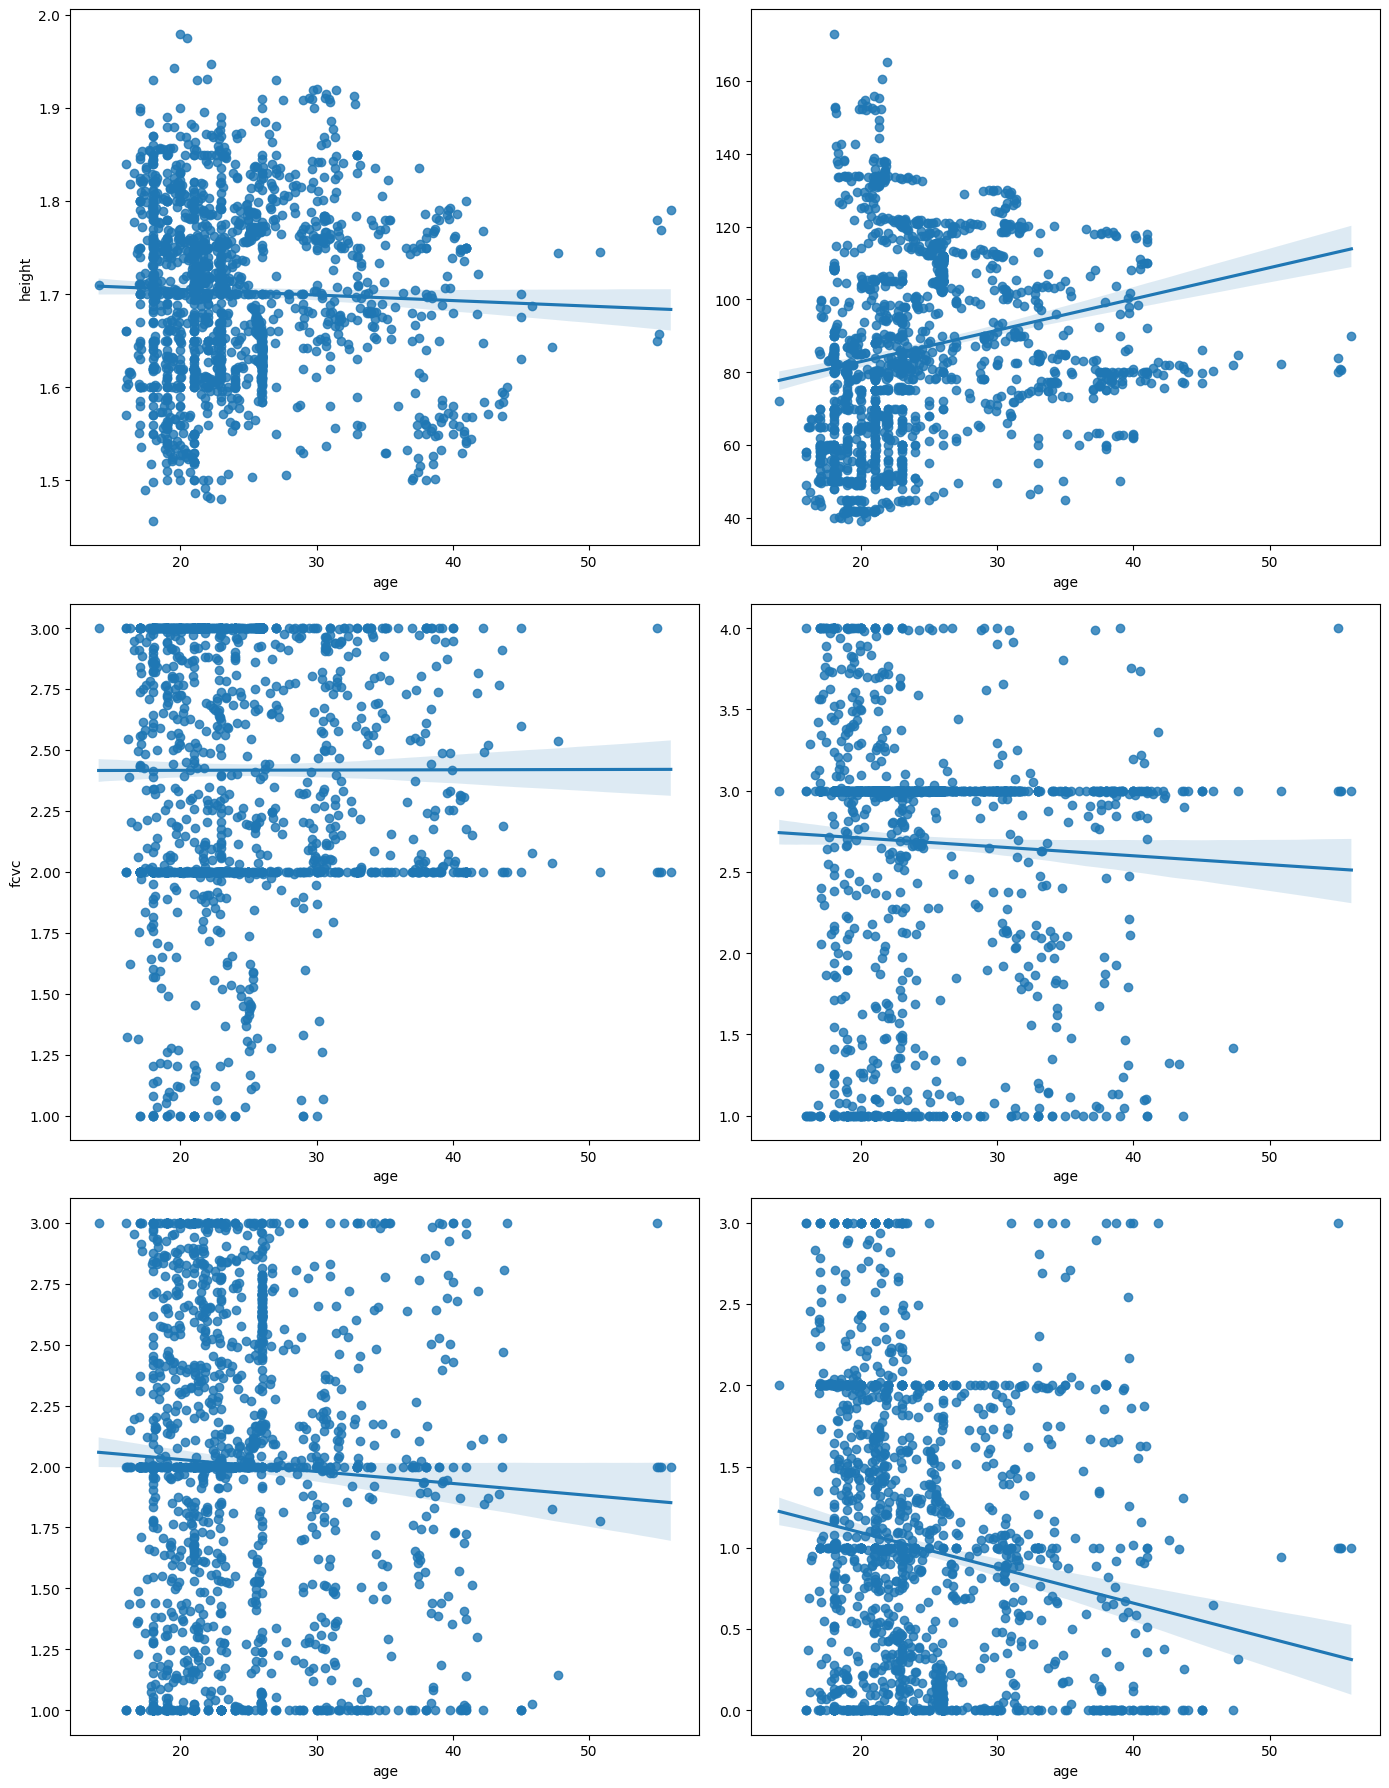

In [13]:
# 3.6 Bivariate analysis - numerical features
# Create a multiple scatter diagram
# Create subplots 
fig, axis = plt.subplots(3, 2, figsize=(14, 18)) 

# Scatter plots with regression lines 
sns.regplot(ax=axis[0, 0], data=df_train, x="age", y="height") 
sns.regplot(ax=axis[0, 1], data=df_train, x="age", y="weight").set(ylabel=None) 
sns.regplot(ax=axis[1, 0], data=df_train, x="age", y="fcvc") 
sns.regplot(ax=axis[1, 1], data=df_train, x="age", y="ncp").set(ylabel=None) 
sns.regplot(ax=axis[2, 0], data=df_train, x="age", y="ch2o").set(ylabel=None) 
sns.regplot(ax=axis[2, 1], data=df_train, x="age", y="faf").set(ylabel=None) 

# Adjust design
plt.tight_layout()
plt.show()

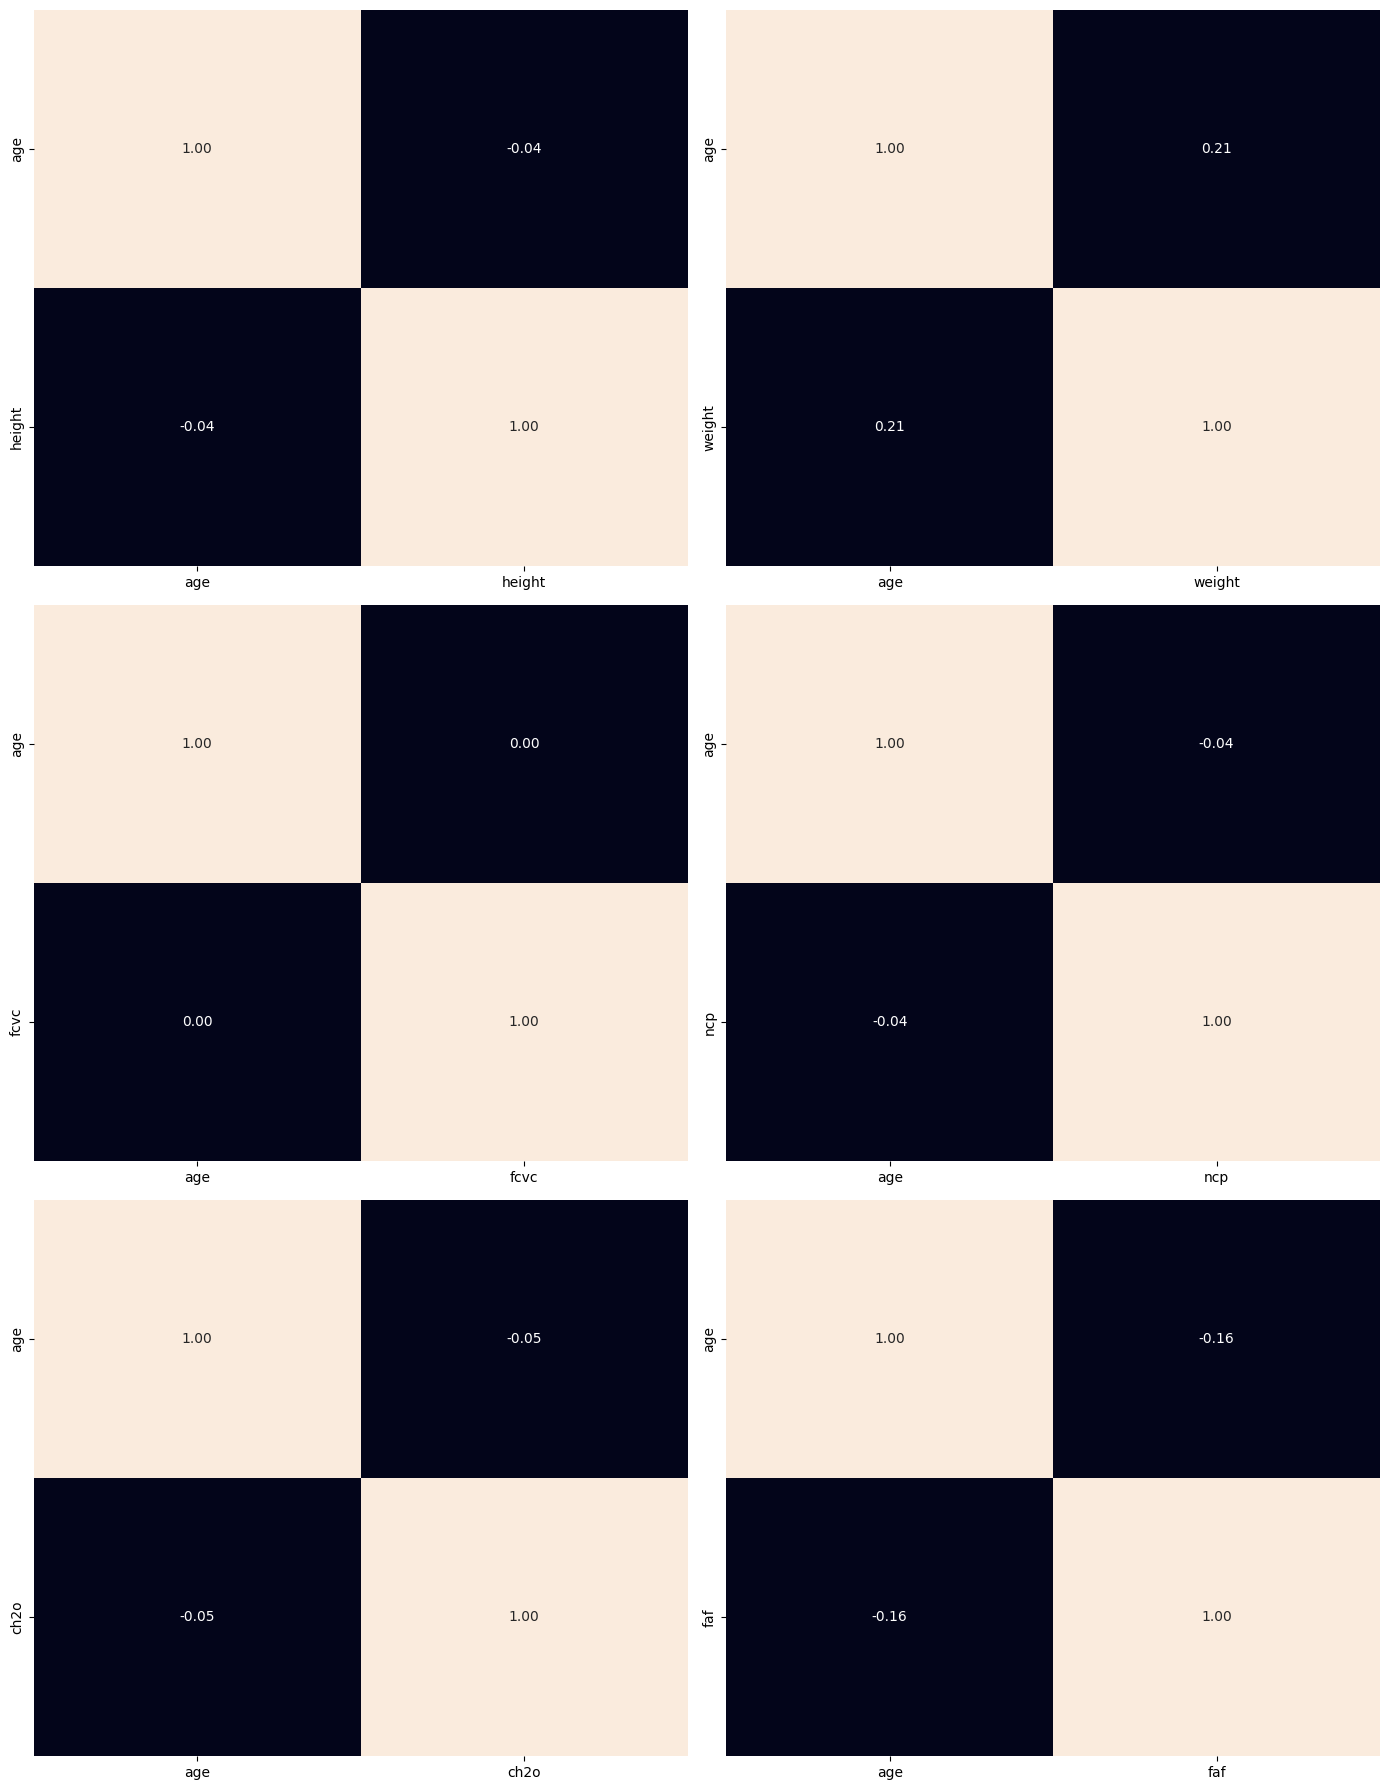

In [14]:
# heatmaps 
fig, axis = plt.subplots(3, 2, figsize=(14, 18)) 

sns.heatmap(df_train[["age", "height"]].corr(), annot=True, fmt=".2f", ax=axis[0, 0], cbar=False) 
sns.heatmap(df_train[["age", "weight"]].corr(), annot=True, fmt=".2f", ax=axis[0, 1], cbar=False) 
sns.heatmap(df_train[["age", "fcvc"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False) 
sns.heatmap(df_train[["age", "ncp"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False) 
sns.heatmap(df_train[["age", "ch2o"]].corr(), annot=True, fmt=".2f", ax=axis[2, 0], cbar=False) 
sns.heatmap(df_train[["age", "faf"]].corr(), annot=True, fmt=".2f", ax=axis[2, 1], cbar=False)

# Adjust design
plt.tight_layout()
plt.show()

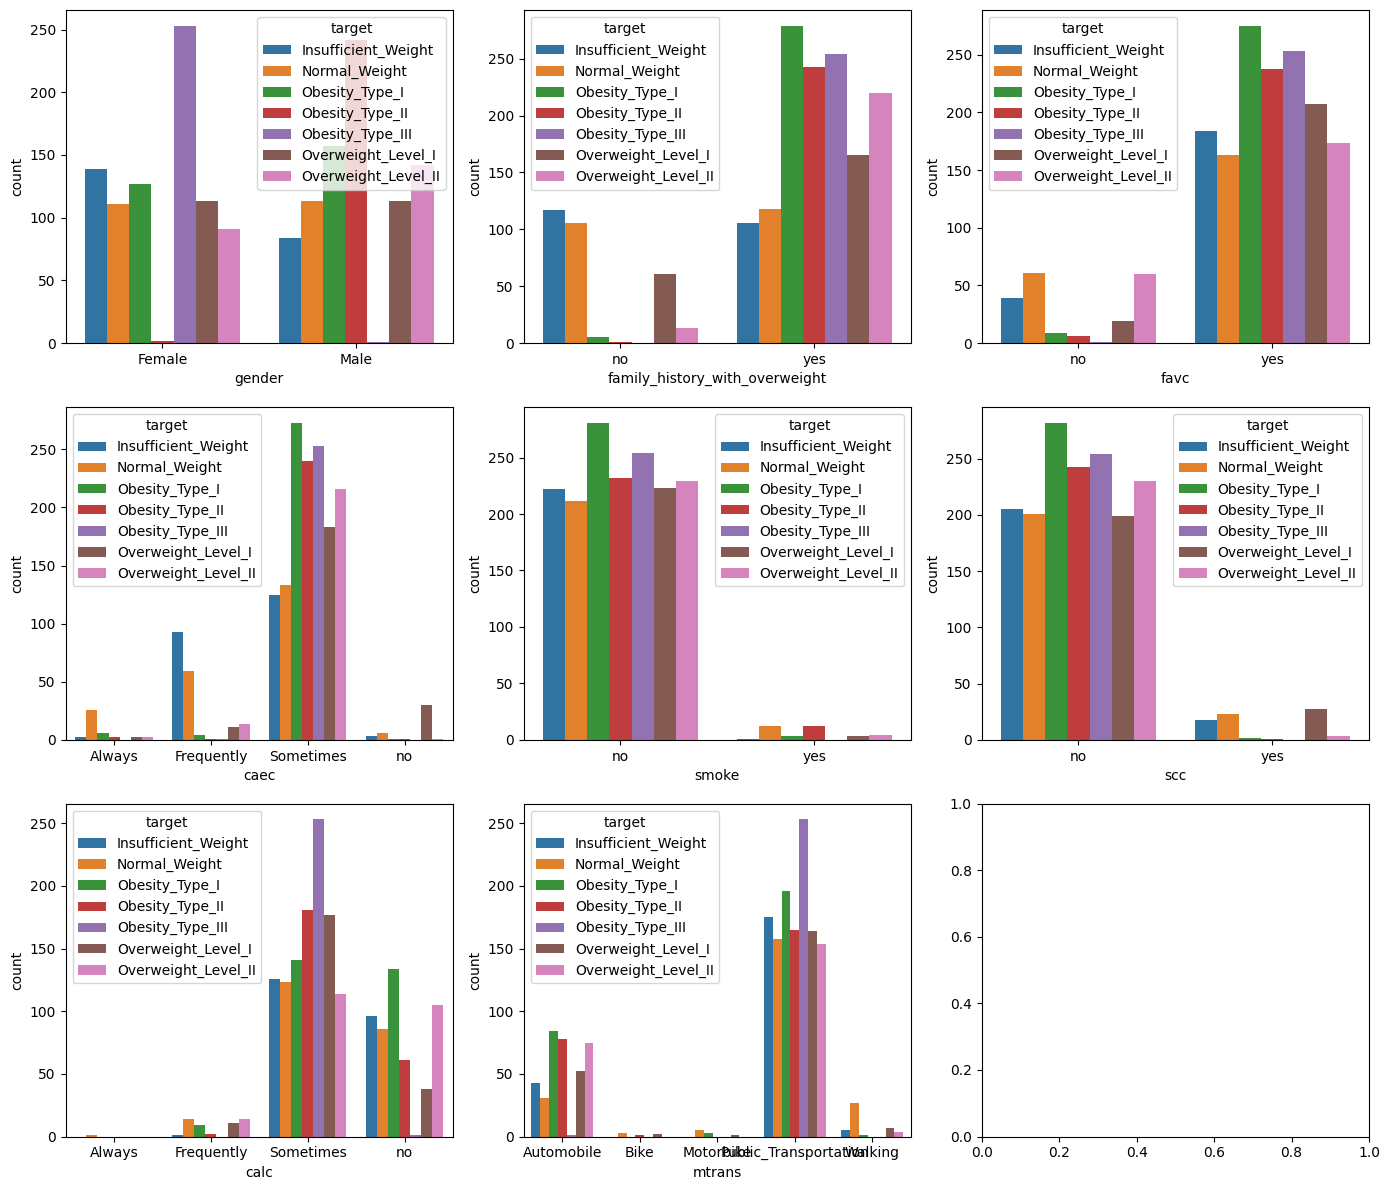

In [15]:
# 3.7 Bivariate analysis - categorical features

# Create subplots 
fig, axis = plt.subplots(3, 3, figsize=(14, 12)) 

# Plotting histograms 
sns.countplot(ax=axis[0, 0], data=df_train, x="gender", hue = "target") 
sns.countplot(ax=axis[0, 1], data=df_train, x="family_history_with_overweight", hue = "target") 
sns.countplot(ax=axis[0, 2], data=df_train, x="favc", hue = "target") 
sns.countplot(ax=axis[1, 0], data=df_train, x="caec", hue = "target") 
sns.countplot(ax=axis[1, 1], data=df_train, x="smoke", hue = "target") 
sns.countplot(ax=axis[1, 2], data=df_train, x="scc", hue = "target") 
sns.countplot(ax=axis[2, 0], data=df_train, x="calc", hue = "target") 
sns.countplot(ax=axis[2, 1], data=df_train, x="mtrans", hue = "target") 

# Show plot 
plt.tight_layout() 

# Adjust subplots to fit into the figure area. 
plt.show()

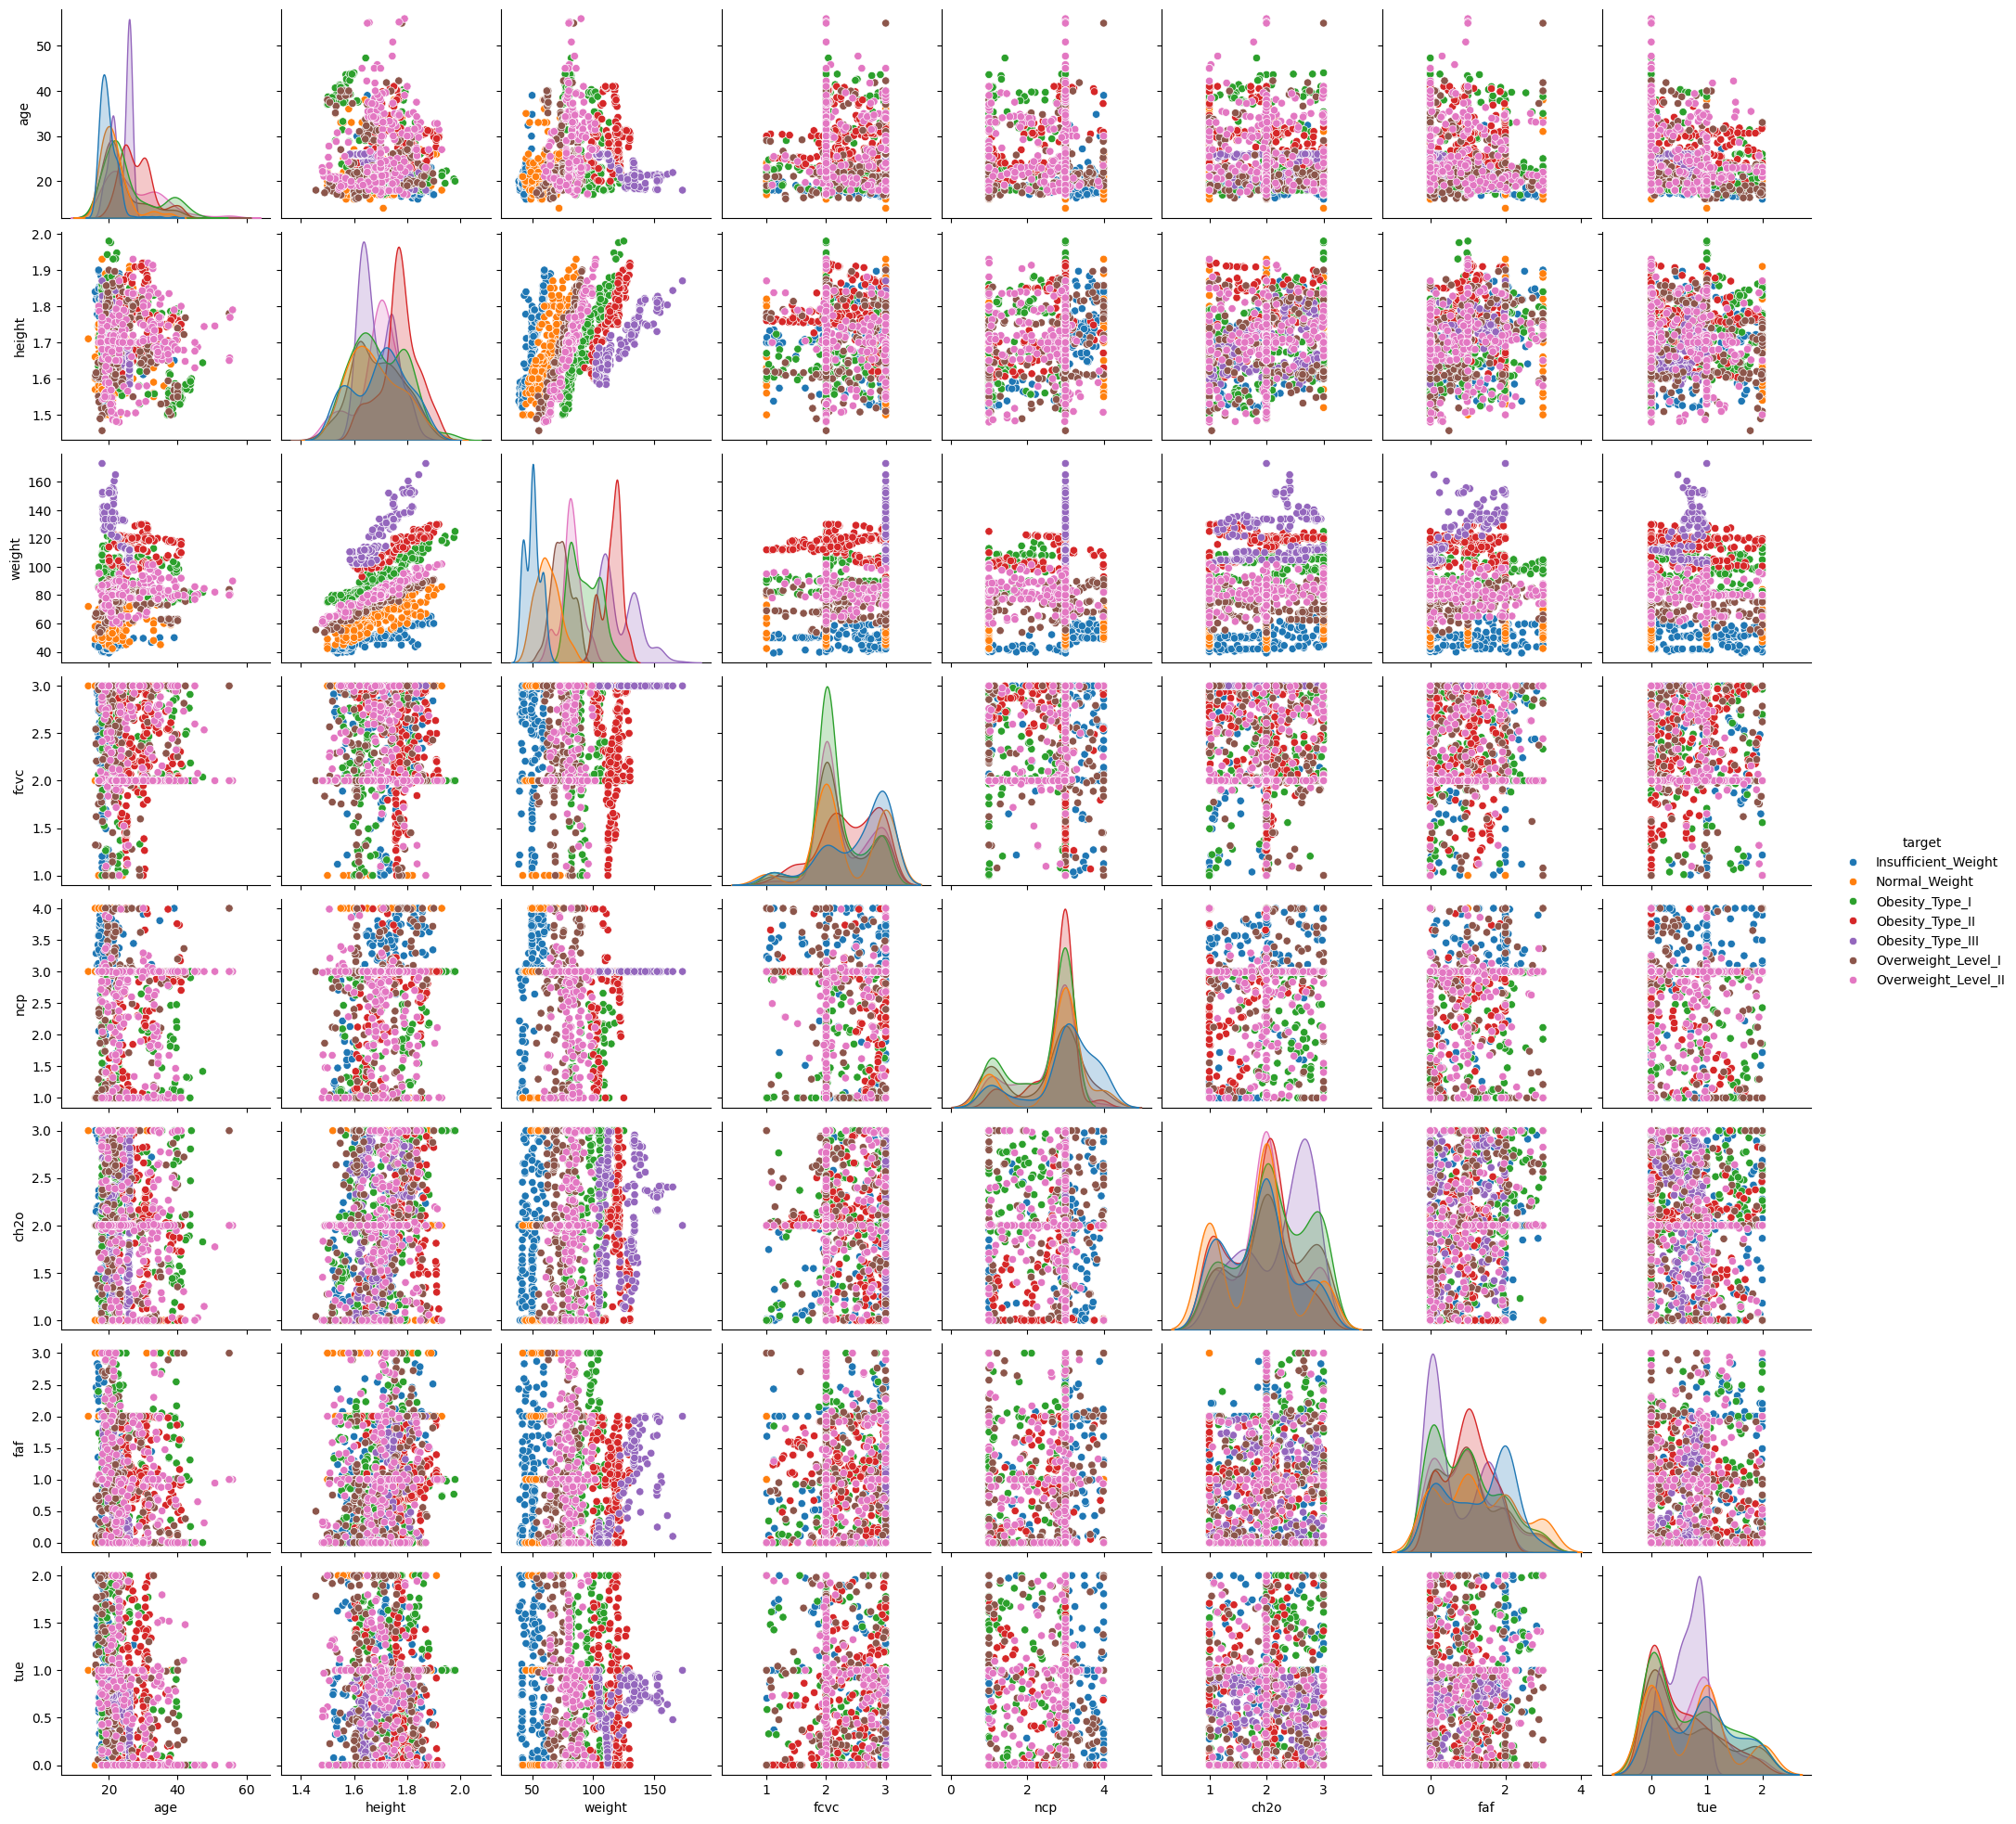

In [16]:
# 3.7 Bivariate analysis - categorical vs numerical features
sns.pairplot(data = df_train, hue = "target")
plt.show()

In [17]:
# 4. Machine Learning
# Enconde target
le = LabelEncoder() 
df_train['target'] = le.fit_transform(df_train['target']) 
df_test['target'] = le.transform(df_test['target'])

# Create training and testing dataframes
X_train = df_train.drop(columns=['target']) 
y_train = df_train['target'] 
X_test = df_test.drop(columns=['target']) 
y_test = df_test['target']

In [18]:
# Define columns for numerical and categorical features
numerical_features = ['age', 'height', 'weight', 'fcvc', 'ncp', 'ch2o', 'faf', 'tue'] 
categorical_features = ['gender', 'family_history_with_overweight', 'favc', 'caec', 'smoke', 'scc', 'calc', 'mtrans']

In [21]:
# Create the preprocessing transformer
preprocessor = ColumnTransformer( 
    transformers=[ 
        ('num', StandardScaler(), numerical_features), 
        ('cat', OneHotEncoder(), categorical_features) 
    ]
)

In [22]:
# Set up the pipeline including preprocessing and the KNeighborsClassifier
pipeline = Pipeline(steps=[ 
    ('preprocessor', preprocessor), 
    ('classifier', KNeighborsClassifier(n_neighbors=5))
    ]
)

In [23]:
# Train model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'height', 'weight',
                                                   'fcvc', 'ncp', 'ch2o', 'faf',
                                                   'tue']),
                                                 ('cat', OneHotEncoder(),
                                                  ['gender',
                                                   'family_history_with_overweight',
                                                   'favc', 'caec', 'smoke',
                                                   'scc', 'calc',
                                                   'mtrans'])])),
                ('classifier', KNeighborsClassifier())])

In [24]:
# Set up the pipeline including preprocessing and the KNeighborsClassifier
pipeline = Pipeline(steps=[ 
    ('preprocessor', preprocessor), 
    ('classifier', KNeighborsClassifier(n_neighbors=5))
    ]
)

In [25]:
# Train model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'height', 'weight',
                                                   'fcvc', 'ncp', 'ch2o', 'faf',
                                                   'tue']),
                                                 ('cat', OneHotEncoder(),
                                                  ['gender',
                                                   'family_history_with_overweight',
                                                   'favc', 'caec', 'smoke',
                                                   'scc', 'calc',
                                                   'mtrans'])])),
                ('classifier', KNeighborsClassifier())])

In [26]:
y_pred = pipeline.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.82


In [27]:
# Save the model
import joblib
joblib.dump(pipeline, 'knn_pipeline_model.joblib') 
print("Model saved to optimized_knn_pipeline_model.joblib")

Model saved to optimized_knn_pipeline_model.joblib


In [28]:
X_train.sample(10)

gender        age    height      weight family_history_with_overweight  \
1454    Male  17.888073  1.841879   60.000000                            yes   
680     Male  22.277859  1.947406  116.893105                            yes   
538   Female  18.177882  1.821566  142.102468                            yes   
1431  Female  22.000000  1.650000   60.000000                            yes   
813     Male  22.789402  1.641870  104.270062                            yes   
520   Female  26.000000  1.633887  111.878132                            yes   
934   Female  21.868932  1.731261   78.175706                            yes   
604   Female  20.000000  1.625236   74.433362                            yes   
1360    Male  18.068767  1.787787   52.000000                            yes   
346     Male  28.404332  1.787379  112.173731                            yes   

     favc      fcvc       ncp       caec smoke      ch2o scc       faf  \
1454  yes  3.000000  3.732126  Sometimes    no  2.000000  no  2.000934   
680   yes  2.000000  3.000000  Sometimes    no  3.000000  no  0.975187   
538   yes  3.000000  3.000000  Sometimes    no  2.714949  no  1.999773   
1431  yes  3.000000  3.000000  Sometimes    no  2.000000  no  1.000000   
813   yes  2.869833  1.569176  Sometimes    no  1.533682  no  0.167943   
520   yes  3.000000  3.000000  Sometimes    no  2.621976  no  0.000000   
934   yes  2.577427  1.000000  Sometimes    no  2.000000  no  2.287423   
604    no  2.522399  1.032887  Sometimes    no  2.397653  no  2.358699   
1360  yes  3.000000  3.000000  Sometimes    no  2.000000  no  0.854337   
346   yes  1.878251  3.000000  Sometimes    no  2.022933  no  0.000000   

           tue       calc                 mtrans  
1454  0.384662         no             Automobile  
680   1.000000  Sometimes  Public_Transportation  
538   0.813784  Sometimes  Public_Transportation  
1431  0.000000  Sometimes             Automobile  
813   1.368262         no  Public_Transportation  
520   0.123861  Sometimes  Public_Transportation  
934   0.000000  Sometimes  Public_Transportation  
604   0.440087  Sometimes  Public_Transportation  
1360  1.000000  Sometimes  Public_Transportation  
346   0.325445  Sometimes             Automobile

In [29]:
y_train.sample(10)

341     5
187     2
206     4
261     0
76      6
1459    4
8       3
1306    1
157     1
1241    6
Name: target, dtype: int64

In [30]:
from joblib import load

# Load your model
model = load('knn_pipeline_model.joblib')

# Inspect the pipeline steps
print(model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'height', 'weight',
                                                   'fcvc', 'ncp', 'ch2o', 'faf',
                                                   'tue']),
                                                 ('cat', OneHotEncoder(),
                                                  ['gender',
                                                   'family_history_with_overweight',
                                                   'favc', 'caec', 'smoke',
                                                   'scc', 'calc',
                                                   'mtrans'])])),
                ('classifier', KNeighborsClassifier())])
